# Índice de contenidos
1. Antes de empezar

2. Reto 1 - Explorar el conjunto de datos

    2.0.0.1 Explore los datos a vista de pájaro.
    
    2.0.0.2 A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

3. Reto 2 - Eliminar la colinealidad de columnas.

4. Reto 3 - Manejar los valores perdidos

    4.0.0.1 En las celdas siguientes, trate los valores que faltan en el conjunto de datos. Recuerde comentar los fundamentos de sus decisiones.
    
    4.0.0.2 De nuevo, examine el número de valores que faltan en cada columna.

5. Reto 4 - Manejo de datos categóricos WHOIS_*
    
    5.0.0.1 En las celdas siguientes, fije los valores de los países como se ha indicado anteriormente.
    
    5.0.0.2 Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.
    
    5.0.0.3 Después de comprobarlo, mantengamos los 10 valores principales de la columna y reetiquetemos las demás columnas con OTROS.
    
    5.0.0.4 En la siguiente celda, elimine ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'].

6. Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales
    
    6.0.0.1 URL es fácil. Simplemente la eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.
    
    6.0.0.2 Imprima el conteo de valores únicos de CHARSET. Puede ver que sólo hay unos pocos valores únicos. Así que podemos dejarlo como está.
    
    6.0.0.3 Antes de pensar en su propia solución, no lea las instrucciones que vienen a continuación.

7. Desafío 6 - Modelado, predicción y evaluación
    
    7.0.0.1 En este laboratorio probaremos dos modelos diferentes y compararemos nuestros resultados.
    
    7.0.0.2 Nuestro segundo algoritmo es DecisionTreeClassifier.
    
    7.0.0.3 Crearemos otro modelo DecisionTreeClassifier con max_depth=5.

8. Bonus Challenge - Escalado de características

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [147]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

En este laboratorio, exploraremos un conjunto de datos que describe sitios web con diferentes características y los etiqueta como benignos o maliciosos. Utilizaremos algoritmos de aprendizaje supervisado para averiguar qué patrones de características es probable que tengan los sitios web maliciosos y utilizaremos nuestro modelo para predecir sitios web maliciosos.

Sus características serán:

+ URL: es la identificación anónima de la URL analizada en el estudio
+ URL_LENGTH: es el número de caracteres de la URL
+ NUMBER_SPECIAL_CHARACTERS: es el número de caracteres especiales identificados en la URL, como, «/», «%», «#», «&», «. “, ”=»
+ CHARSET: es un valor categórico y su significado es el estándar de codificación de caracteres (también llamado juego de caracteres).
+ SERVER: es un valor categórico y su significado es el sistema operativo del servidor obtenido de la respuesta del paquete.
+ CONTENT_LENGTH: representa el tamaño del contenido de la cabecera HTTP.
+ WHOIS_COUNTRY: es una variable categórica, sus valores son los países que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_STATEPRO: es una variable categórica, sus valores son los estados que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_REGDATE: Whois proporciona la fecha de registro del servidor, por tanto, esta variable tiene valores de fecha con formato DD/MM/AAAA HH:MM
+ WHOIS_UPDATED_DATE: A través del Whois obtenemos la última fecha de actualización del servidor analizado
+ TCP_CONVERSATION_EXCHANGE: Esta variable es el número de paquetes TCP intercambiados entre el servidor y nuestro cliente honeypot
+ DIST_REMOTE_TCP_PORT: es el número de puertos detectados y diferentes a TCP
+ REMOTE_IPS: esta variable tiene el número total de IPs conectadas al honeypot
+ APP_BYTES: es el número de bytes transferidos
+ SOURCE_APP_PACKETS: paquetes enviados desde el honeypot al servidor
+ REMOTE_APP_PACKETS: paquetes recibidos del servidor
+ APP_PACKETS: número total de paquetes IP generados durante la comunicación entre el honeypot y el servidor.
+ DNS_QUERY_TIMES: número de paquetes DNS generados durante la comunicación entre el honeypot y el servidor.
+ TYPE: es una variable categórica, sus valores representan el tipo de página web analizada, en concreto, 1 es para sitios web maliciosos y 0 para sitios web benignos

# Desafío 1 - Explorar el conjunto de datos

Empecemos explorando el conjunto de datos. Primero carga el archivo de datos:

In [159]:
websites = pd.read_csv('website.csv')

#### Explore los datos a vista de pájaro.

Ahora ya deberías estar muy familiarizado con los procedimientos, así que no te daremos las instrucciones paso a paso. Reflexiona sobre lo que hiciste en los laboratorios anteriores y explora el conjunto de datos.

Cosas que buscarás:

* ¿Qué aspecto tiene el conjunto de datos?
* ¿Cuáles son los tipos de datos?
* ¿Qué columnas contienen las características de los sitios web?
* ¿Qué columna contiene la característica que vamos a predecir? ¿Cuál es el código de los sitios web benignos frente a los maliciosos?
* ¿Necesitamos transformar alguna de las columnas de categórica a ordinal? En caso afirmativo, ¿cuáles son esas columnas?

Siéntete libre de añadir celdas adicionales para tus exploraciones. Asegúrate de comentar lo que descubras.

In [6]:
# What the dataset looks like?
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [49]:
websites.tail()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,...,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0
1780,B0_676,249,40,utf-8,Microsoft-IIS/8.5,24435.0,US,Wisconsin,14/11/2008 0:00,20/11/2013 0:00,...,6,11,2314,25,28,3039,2776,25,6.0,0


In [50]:
websites.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [51]:
websites.shape

(1781, 21)

In [52]:
# What are the data types?
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [161]:
website_copy = websites.copy()

# Which columns contain the features of the websites?
All the columns except Type, Source_App_Bytes and Remote_App_Bytes.

# Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
The column that has the feature we will predict is Type.

The code is boolean, 0 for benign and 1 for malicious. 

# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?
De acuerdo con los datos proporcionados, algunas columnas categóricas pueden necesitar ser transformadas. Las columnas CHARSET, SERVER, WHOIS_COUNTRY, WHOIS_STATEPRO, WHOIS_REGDATE, y WHOIS_UPDATED_DATE son variables categóricas que probablemente no tengan un orden implícito

#### A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

En el laboratorio de aprendizaje supervisado Mushroom que hicimos recientemente, mencionamos que nos preocupa si nuestro conjunto de datos tiene columnas fuertemente correlacionadas porque si es el caso tenemos que elegir ciertos algoritmos de ML en lugar de otros. Ahora tenemos que evaluar esto para nuestro conjunto de datos.

Por suerte, la mayoría de las columnas de este conjunto de datos son ordinales, lo que nos facilita mucho las cosas. En las siguientes celdas, evalúe el nivel de colinealidad de los datos.

Aquí tienes algunas indicaciones generales que puede consultar para completar este paso:

1. Crea una matriz de correlaciones utilizando las columnas numéricas del conjunto de datos.

2. Crea un mapa de calor utilizando `seaborn` para visualizar qué columnas tienen una alta colinealidad.

3. Comenta qué columnas podría necesitar eliminar debido a la alta colinealidad.

                           URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  \
URL_LENGTH                   1.000000                   0.917986   
NUMBER_SPECIAL_CHARACTERS    0.917986                   1.000000   
CONTENT_LENGTH               0.129745                   0.214225   
TCP_CONVERSATION_EXCHANGE   -0.038407                  -0.037459   
DIST_REMOTE_TCP_PORT        -0.039839                  -0.042619   
REMOTE_IPS                  -0.046367                  -0.047103   
APP_BYTES                   -0.026446                  -0.023914   
SOURCE_APP_PACKETS          -0.042264                  -0.040096   
REMOTE_APP_PACKETS          -0.033779                  -0.030597   
SOURCE_APP_BYTES            -0.014857                  -0.014376   
REMOTE_APP_BYTES            -0.026686                  -0.024098   
APP_PACKETS                 -0.042264                  -0.040096   
DNS_QUERY_TIMES             -0.068582                  -0.050048   
Type                         0.162104           

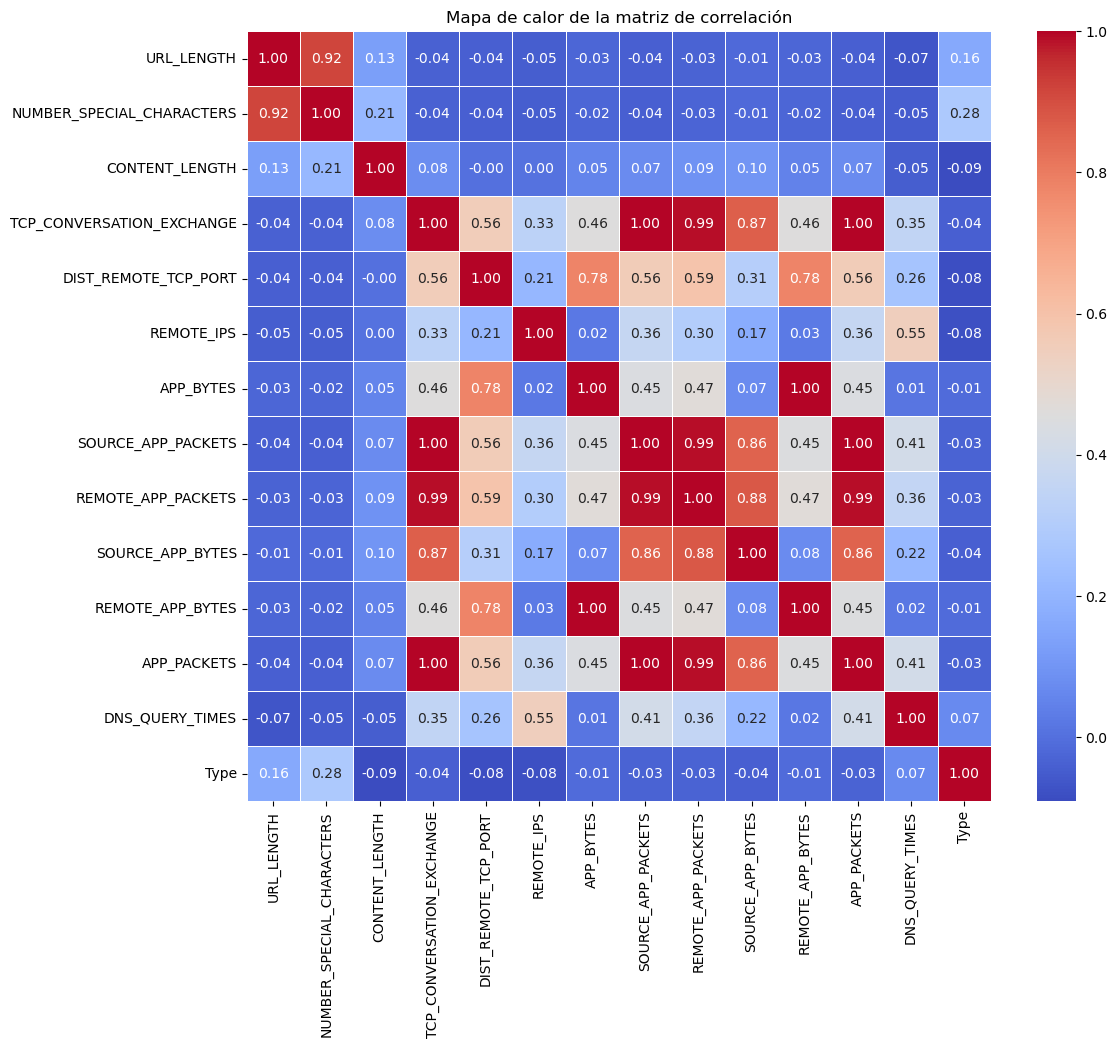

In [163]:
# Your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Asumimos que el conjunto de datos ya está cargado en 'websites'
# Seleccionamos solo las columnas numéricas
numerical_columns = website_copy.select_dtypes(include=['int64', 'float64'])

# Creamos la matriz de correlación
correlation_matrix = numerical_columns.corr()

# Mostramos la matriz de correlación
print(correlation_matrix)

# Configurar el tamaño del mapa de calor
plt.figure(figsize=(12, 10))

# Crear el mapa de calor utilizando seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Título del mapa de calor
plt.title("Mapa de calor de la matriz de correlación")
plt.show()

### Este es un ejemplo para conocer la importancia de las características usando un modelo ML

In [18]:
!pip install xgboost

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Identificar las columnas categóricas
categorical_columns = ['CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO']

# Codificar las columnas categóricas
encoder = LabelEncoder()
for col in categorical_columns:
    website_copy[col] = encoder.fit_transform(website_copy[col].fillna('Unknown'))  # Rellenamos valores nulos antes de codificar

# Dividir los datos en características (X) y variable objetivo (y)
X = website_copy.drop(['Type', 'URL', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1)  # Eliminar columnas innecesarias
y = website_copy['Type']  # La variable objetivo es 'Type'

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X = website_copy._get_numeric_data().drop('Type', axis=1)
y = website_copy.Type

In [167]:
import xgboost as xgb

# Crear el modelo XGBoost
model = xgb.XGBClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

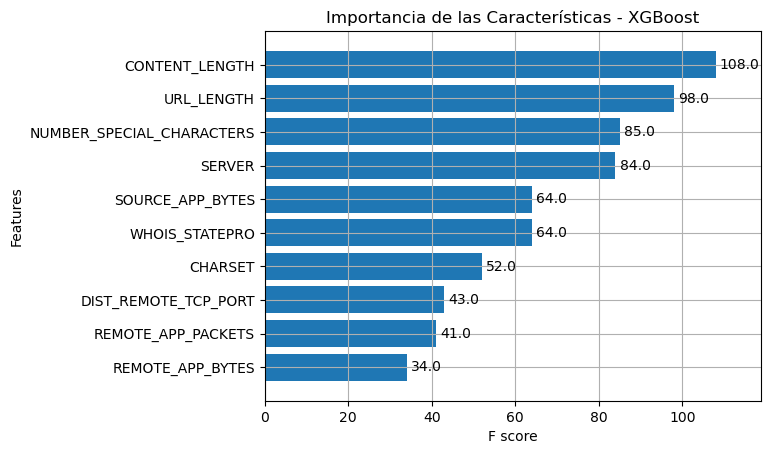

In [169]:
import matplotlib.pyplot as plt

# Graficar la importancia de las características
xgb.plot_importance(model, importance_type='weight', max_num_features=10, height=0.8)
plt.title('Importancia de las Características - XGBoost')
plt.show()


    En el gráfico anterior podemos ver las características con menor peso en el conjunto de datos.

# Desafío 2 - Eliminar la colinealidad de columnas.

En el mapa de calor que ha creado, deberías haber visto al menos 3 columnas que pueden eliminarse debido a la alta colinealidad. Elimina estas columnas del conjunto de datos.

Ten en cuenta que debes eliminar el menor número posible de columnas. No tienes que eliminar todas las columnas a la vez. En su lugar, intenta eliminar una columna y, a continuación, vuelve a elaborar el mapa térmico para determinar si deben eliminarse columnas adicionales. Cuando el conjunto de datos ya no contenga columnas correlacionadas en más de un 90%, puedes parar. Además, ten en cuenta que cuando dos columnas tienen una alta colinealidad, sólo necesitas eliminar una de ellas, pero no ambas.

En las celdas de abajo, elimina tantas columnas como puedas para eliminar la alta colinealidad en el conjunto de datos. Asegúrate de comentar tu camino para que se pueda conocer tu razonamiento, lo que permitirá dar feedback. Al final, vuelve a imprimir el mapa de calor.

In [179]:
# Eliminar las columnas 'URL', 'WHOIS_REGDATE', y 'WHOIS_UPDATED_DATE'
websites_cleaned = website_copy.drop(columns=['URL', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'])

# Verificar las primeras filas para asegurarse de que las columnas se han eliminado
print(websites_cleaned.head())


   URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  CHARSET  SERVER  CONTENT_LENGTH  \
0          16                          7        4     200           263.0   
1          16                          6        2      61         15087.0   
2          16                          6        5     115           324.0   
3          17                          6        1     200           162.0   
4          17                          6        2     140        124140.0   

   WHOIS_COUNTRY  WHOIS_STATEPRO  TCP_CONVERSATION_EXCHANGE  \
0             44             145                          7   
1             44             145                         17   
2             44             145                          0   
3             41               4                         31   
4             41             136                         57   

   DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  SOURCE_APP_PACKETS  \
0                     0           2        700                   9   
1                 

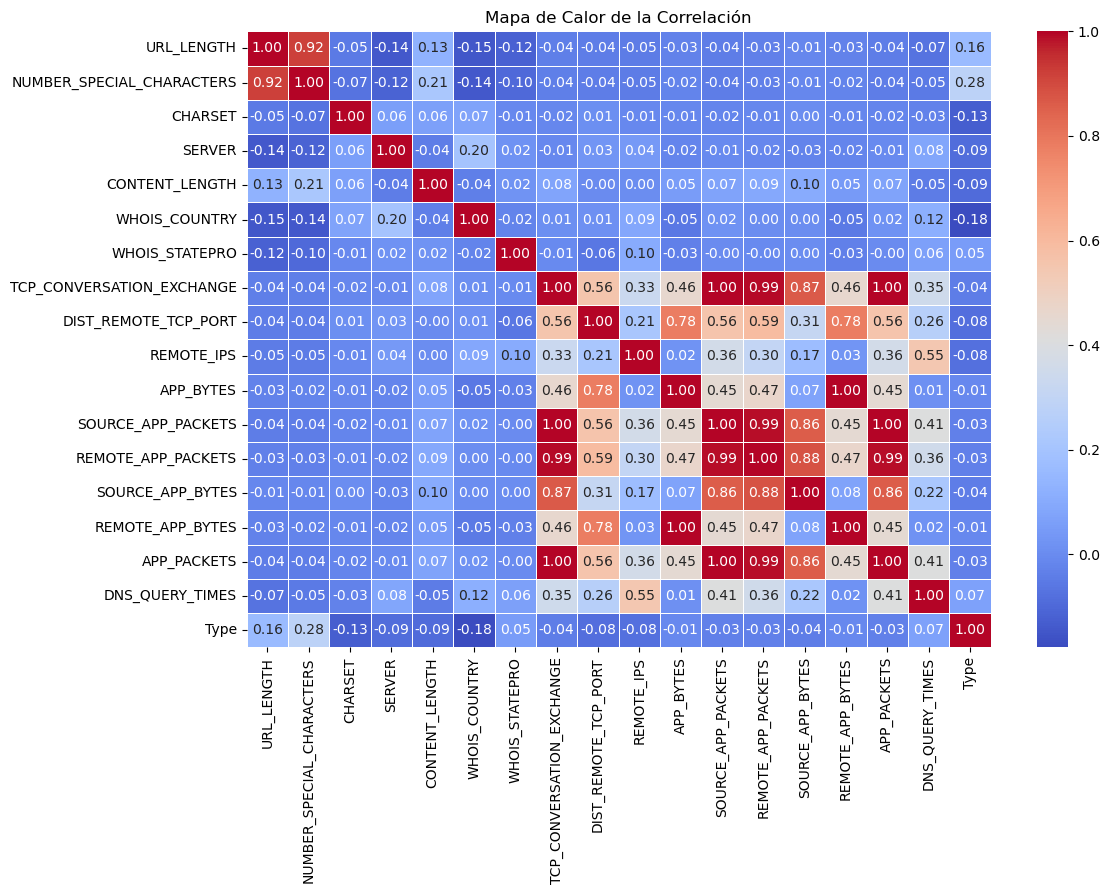

In [181]:
# Calcular la matriz de correlación
correlation_matrix = websites_cleaned.corr()

# Graficar el mapa de calor de la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de la Correlación')
plt.show()


# Reto 3 - Manejar los valores que faltan

El siguiente paso sería manejar los valores faltantes. **Comenzamos examinando el número de valores que faltan en cada columna.**

In [183]:
# Your code here
# Drop columns with more than 50% missing values
threshold = 0.5  # 50%
websites_cleaned = websites.dropna(axis=1, thresh=int((1-threshold) * len(websites)))

# Show the updated dataframe shape and the columns that remain
print(f"Shape of the dataframe after dropping columns: {websites_cleaned.shape}")
print("Columns after dropping with more than 50% missing data:")
print(websites_cleaned.columns)


Shape of the dataframe after dropping columns: (1781, 21)
Columns after dropping with more than 50% missing data:
Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')


In [187]:
# Now we will drop the rows with missing data
# Drop rows with any missing values
websites_cleaned = websites_cleaned.dropna(axis=0)

# Show the updated dataframe shape and number of remaining rows
print(f"Shape of the dataframe after dropping rows with missing data: {websites_cleaned.shape}")

Shape of the dataframe after dropping rows with missing data: (636, 21)


#### De nuevo, examina el número de valores que faltan en cada columna. 

    Si todos están limpios, procede. Si no, vuelve atrás y haz más limpieza.

In [189]:
# Calculate the threshold for missing values (50% of the data)
threshold = len(websites_cleaned) * 0.5

# Drop columns with more than 50% missing values
df_cleaned = websites_cleaned.dropna(axis=1, thresh=threshold)

# Check the resulting dataframe
print(df_cleaned.isnull().sum())


URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64


In [191]:
# Check for missing values in each column
missing_values = df_cleaned.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(df_cleaned)) * 100

# Create a DataFrame to display the results clearly
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Sort by the number of missing values, from highest to lowest
missing_data = missing_data.sort_values(by='Missing Values', ascending=False)

# Display the missing data summary
print(missing_data)

                           Missing Values  Percentage
URL                                     0         0.0
DIST_REMOTE_TCP_PORT                    0         0.0
DNS_QUERY_TIMES                         0         0.0
APP_PACKETS                             0         0.0
REMOTE_APP_BYTES                        0         0.0
SOURCE_APP_BYTES                        0         0.0
REMOTE_APP_PACKETS                      0         0.0
SOURCE_APP_PACKETS                      0         0.0
APP_BYTES                               0         0.0
REMOTE_IPS                              0         0.0
TCP_CONVERSATION_EXCHANGE               0         0.0
URL_LENGTH                              0         0.0
WHOIS_UPDATED_DATE                      0         0.0
WHOIS_REGDATE                           0         0.0
WHOIS_STATEPRO                          0         0.0
WHOIS_COUNTRY                           0         0.0
CONTENT_LENGTH                          0         0.0
SERVER                      

# Reto 4 - Manejar datos categóricos `WHOIS_*

Hay varias columnas categóricas que necesitamos manejar. Estas columnas son:

* URL
* CHARSET
* SERVIDOR
* PAÍS
* «WHOIS_STATEPRO
* WHOIS_REGDATE
* WHOIS_UPDATED_DATE

La forma de tratar las columnas de cadena es siempre caso por caso. Empecemos trabajando con `WHOIS_COUNTRY`. Tus pasos son:

1. Enumera los valores únicos de `WHOIS_COUNTRY`.
1. Consolide los valores de país con códigos de país coherentes. Por ejemplo, los siguientes valores se refieren al mismo país y deben utilizar un código de país coherente:
    * `CY` y `Cyprus`.
    * US y US
    * SE y SE
    * GB, Reino Unido y GB, Reino Unido.

#### En las celdas de abajo, fija los valores de los países como se indica arriba.

In [205]:
# Your code here
# Definir el diccionario 'good_country' con los códigos de países
good_country = {
    'None': 'None', 
    'US': 'US', 
    'SC': 'SC', 
    'GB': 'UK', 
    'UK': 'UK', 
    'RU': 'RU', 
    'AU': 'AU', 
    'CA': 'CA',
    'PA': 'PA',
    'se': 'SE', 
    'IN': 'IN',
    'LU': 'LU', 
    'TH': 'TH', 
    "[u'GB'; u'UK']": 'UK', 
    'FR': 'FR',
    'NL': 'NL',
    'UG': 'UG', 
    'JP': 'JP', 
    'CN': 'CN', 
    'SE': 'SE',
    'SI': 'SI', 
    'IL': 'IL', 
    'ru': 'RU', 
    'KY': 'KY', 
    'AT': 'AT', 
    'CZ': 'CZ', 
    'PH': 'PH', 
    'BE': 'BE', 
    'NO': 'NO', 
    'TR': 'TR', 
    'LV': 'LV',
    'DE': 'DE', 
    'ES': 'ES', 
    'BR': 'BR', 
    'us': 'US', 
    'KR': 'KR', 
    'HK': 'HK', 
    'UA': 'UA', 
    'CH': 'CH', 
    'United Kingdom': 'UK',
    'BS': 'BS', 
    'PK': 'PK', 
    'IT': 'IT', 
    'Cyprus': 'CY', 
    'BY': 'BY', 
    'AE': 'AE', 
    'IE': 'IE', 
    'UY': 'UY', 
    'KG': 'KG'
}

# Aplicar el diccionario a la columna WHOIS_COUNTRY
df_cleaned['WHOIS_COUNTRY'] = df_cleaned['WHOIS_COUNTRY'].apply(lambda x: good_country.get(x, x))

# Ver los valores únicos después de la transformación
print(df_cleaned['WHOIS_COUNTRY'].unique())

# Ver el conteo de los países
print(df_cleaned['WHOIS_COUNTRY'].value_counts())

['US' 'RU' 'AU' 'CA' 'PA' 'UK' 'IN' 'UG' 'JP' 'SI' 'AT' 'CN' 'KY' 'TR'
 'SC' 'NL' 'UA' 'CH' 'HK' 'IL' 'DE' 'IT' 'BS' 'NO' 'BE' 'BY' 'AE' 'IE'
 'PH' 'UY']
WHOIS_COUNTRY
US    513
CA     41
UK     16
AU     11
PA     10
JP      6
CH      5
IN      4
AT      4
SC      2
BS      2
UA      2
UY      2
CN      2
TR      1
UG      1
PH      1
IE      1
AE      1
BY      1
BE      1
NO      1
IT      1
KY      1
DE      1
IL      1
HK      1
SI      1
RU      1
NL      1
Name: count, dtype: int64


Ya que hemos fijado los valores de los países, ¿podemos convertir ahora esta columna en ordinal?

Todavía no. Si reflexionas, en los laboratorios anteriores sobre cómo manejamos las columnas categóricas, probablemente recuerdes que acabamos eliminando muchas de esas columnas porque hay demasiados valores únicos. Demasiados valores únicos en una columna no es deseable en el aprendizaje automático porque hace que la predicción sea inexacta. Pero hay soluciones bajo ciertas condiciones. Una de las condiciones solucionables es:

#### Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.

La columna `WHOIS_COUNTRY` resulta ser este caso. Puedes comprobarlo imprimiendo un gráfico de barras de los `value_counts` en la siguiente celda para verificarlo:

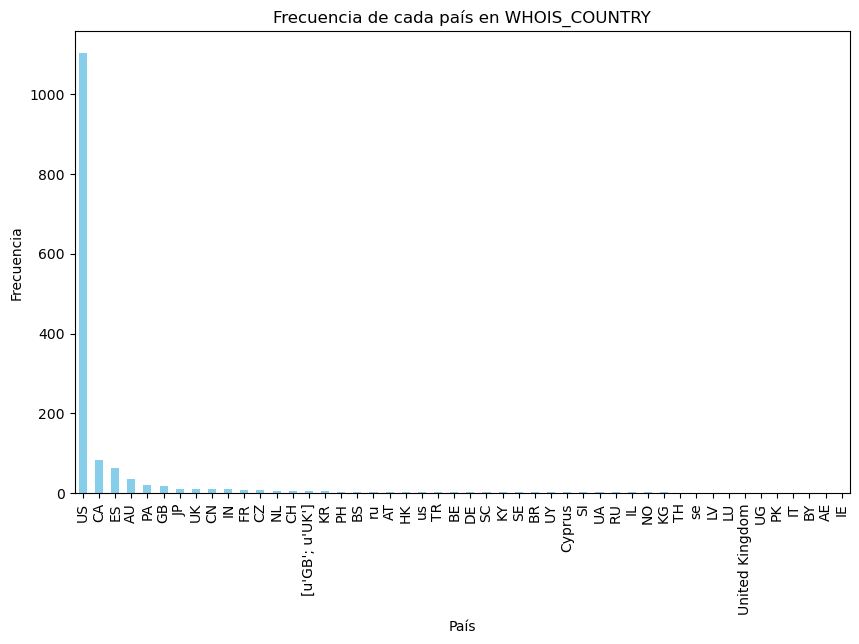

In [225]:
import matplotlib.pyplot as plt

# Contar la frecuencia de cada valor en la columna WHOIS_COUNTRY
country_counts_websites = websites['WHOIS_COUNTRY'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
country_counts_websites.plot(kind='bar', color='skyblue')
plt.title('Frecuencia de cada país en WHOIS_COUNTRY')
plt.xlabel('País')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()


#### Después de verificar, ahora vamos a mantener los 10 primeros valores de la columna y volver a etiquetar otras columnas con `OTHER`.

In [229]:
# Contar la frecuencia de cada valor en la columna WHOIS_COUNTRY
country_counts = df_cleaned['WHOIS_COUNTRY'].value_counts()

# Seleccionar los 10 primeros valores más frecuentes
top_10_countries = country_counts.head(10).index

# Reemplazar los valores que no están en los 10 primeros por 'Other'
df_cleaned['WHOIS_COUNTRY'] = df_cleaned['WHOIS_COUNTRY'].apply(lambda x: x if x in top_10_countries else 'Other')

# Verificar los valores únicos después de la transformación
print(df_cleaned['WHOIS_COUNTRY'].value_counts())

WHOIS_COUNTRY
US       513
Other     66
CA        41
UK        16
Name: count, dtype: int64


Ahora que se ha cambiado la etiqueta `WHOIS_COUNTRY`, ya no necesitamos `WHOIS_STATEPRO` porque los valores de los estados o provincias pueden dejar de ser relevantes. Eliminaremos esta columna.

Además, también eliminaremos `WHOIS_REGDATE` y `WHOIS_UPDATED_DATE`. Se trata de las fechas de registro y actualización de los dominios del sitio web. No son de nuestra incumbencia.

#### En la siguiente celda, elimina `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [231]:
# Eliminar las columnas innecesarias
df_cleaned = df_cleaned.drop(columns=['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'])

# Verificar que las columnas hayan sido eliminadas
print(df_cleaned.columns)

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')


# Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales

Ahora vuelve a imprimir los `dtypes` de los datos. Además de `WHOIS_COUNTRY` que ya hemos arreglado, deberían quedar 3 columnas categóricas: `URL`, `CHARSET`, y `SERVER`.

In [233]:
# Your code here
df_cleaned.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` es fácil. Simplemente lo eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.

In [235]:
# Your code here
df_cleaned = df_cleaned.drop('URL', axis=1)

# Verify the columns after dropping 'URL'
print(df_cleaned.columns)

Index(['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')


#### Imprime el recuento de valores únicos de `CHARSET`. Usted ve que hay sólo unos pocos valores únicos. Así que podemos dejarlo como está.

In [237]:
# Your code here
charset_counts = df_cleaned['CHARSET'].value_counts()

# Display the unique value counts
charset_counts


CHARSET
UTF-8           200
ISO-8859-1      169
utf-8           108
us-ascii         92
iso-8859-1       66
windows-1251      1
Name: count, dtype: int64

`SERVER` es un poco más complicado. Imprime sus valores únicos y piensa cómo puedes consolidar esos valores.

#### Antes de pensar en tu propia solución, no leas las instrucciones que vienen a continuación.

In [239]:
# Your code here
server_unique_values = df_cleaned['SERVER'].unique()

# Print the unique values
server_unique_values


array(['nginx', 'Apache/2', 'Microsoft-HTTPAPI/2.0',
       'Apache/2.4.7 (Ubuntu)', 'Apache',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Apache/2.2.22', 'Microsoft-IIS/7.5', 'nginx/1.12.0',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Apache/2.2.22 (Debian)', 'Apache/2.4.25 (Amazon) PHP/7.0.14',
       'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips',
       'Apache/2.2.22 (Ubuntu)', 'Apache/2.4.25',
       'Apache/2.4.18 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.6 (CentOS) PHP/5.6.8', 'AmazonS3', 'ATS',
       'CherryPy/3.6.0', 'Apache/2.2.15 (CentOS)',
       'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.6 (CentOS) OpenSSL/1.0.1e-fips mod_fcgid/2.3.9 PHP/5.4.16 mod_jk/1.2.40',
       'Apache/2.2.3 (CentOS)', 'Apache/2.4', 'Apache/2.4.10 (Debian)',
       'Apache/2.2.29 (Unix) mod_ssl/2.2.29 OpenSSL/1.0.1e

Aunque hay tantos valores únicos en la columna `SERVER`, en realidad sólo hay 3 tipos principales de servidores: Microsoft, Apache y Nginx. Simplemente comprueba si cada valor de `SERVER` contiene alguno de esos tipos de servidor y vuelve a etiquetarlos. Para los valores `SERVER` que no contengan ninguna de esas subcadenas, etiquétalos con `Other`.

Al final, la columna «SERVIDOR» sólo debe contener 4 valores únicos: `Microsoft`, `Apache`, `nginx`, y `Other`.

In [241]:
# Función para consolidar los valores en la columna SERVER
def consolidate_server_type(server):
    if 'Microsoft' in server:
        return 'Microsoft'
    elif 'Apache' in server:
        return 'Apache'
    elif 'nginx' in server:
        return 'nginx'
    else:
        return 'Other'

# Aplicar la función a la columna SERVER
df_cleaned['SERVER'] = df_cleaned['SERVER'].apply(consolidate_server_type)

# Verificar los valores únicos después de la transformación
print(df_cleaned['SERVER'].value_counts())

SERVER
Apache       298
Microsoft    127
Other        109
nginx        102
Name: count, dtype: int64


OK, todos nuestros datos categóricos están fijados ahora. **Vamos a convertirlos en datos ordinales usando la función `get_dummies` de Pandas ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Asegúrate de eliminar las columnas categóricas pasando `drop_first=True` a `get_dummies` ya que no las necesitamos. **Además, asigna los datos con valores ficticios a una nueva variable `website_dummy`.

In [243]:
# Your code here
# Convertir las columnas categóricas en variables dummy
website_dummy = pd.get_dummies(df_cleaned[['CHARSET', 'SERVER', 'WHOIS_COUNTRY']], drop_first=True)

# Mostrar las primeras filas del nuevo DataFrame de variables dummy
print(website_dummy.head())

    CHARSET_UTF-8  CHARSET_iso-8859-1  CHARSET_us-ascii  CHARSET_utf-8  \
3           False               False             False          False   
6           False                True             False          False   
7           False               False              True          False   
11          False               False              True          False   
16          False                True             False          False   

    CHARSET_windows-1251  SERVER_Microsoft  SERVER_Other  SERVER_nginx  \
3                  False             False         False          True   
6                  False             False         False         False   
7                  False              True         False         False   
11                 False              True         False         False   
16                 False             False         False          True   

    WHOIS_COUNTRY_Other  WHOIS_COUNTRY_UK  WHOIS_COUNTRY_US  
3                 False             False       

Ahora, inspeccione `website_dummy` para asegurarse de que los datos y tipos son los previstos - no debería haber ninguna columna categórica en este punto.

In [247]:
# Your code here
# Inspeccionar el DataFrame website_dummy para verificar los tipos de datos y la ausencia de columnas 
# categóricas
website_dummy.dtypes

CHARSET_UTF-8           bool
CHARSET_iso-8859-1      bool
CHARSET_us-ascii        bool
CHARSET_utf-8           bool
CHARSET_windows-1251    bool
SERVER_Microsoft        bool
SERVER_Other            bool
SERVER_nginx            bool
WHOIS_COUNTRY_Other     bool
WHOIS_COUNTRY_UK        bool
WHOIS_COUNTRY_US        bool
dtype: object

# Desafío 6 - Modelado, predicción y evaluación

Comenzaremos esta sección dividiendo los datos en train y test. **Nombra tus 4 variables `X_entrenamiento`, `X_prueba`, `y_entrenamiento` y `y_prueba`. Selecciona el 80% de los datos para entrenar y el 20% para probar.**

In [249]:
from sklearn.model_selection import train_test_split

# Your code here:

X = website_dummy  # Variables predictoras (todas las columnas excepto 'Type')
y = df_cleaned['Type']  # Variable objetivo (target)

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Verificar las dimensiones del conjunto de entrenamiento y prueba
print(f"Dimensiones de X_entrenamiento: {X_entrenamiento.shape}")
print(f"Dimensiones de X_prueba: {X_prueba.shape}")
print(f"Dimensiones de y_entrenamiento: {y_entrenamiento.shape}")
print(f"Dimensiones de y_prueba: {y_prueba.shape}")


Dimensiones de X_entrenamiento: (508, 11)
Dimensiones de X_prueba: (128, 11)
Dimensiones de y_entrenamiento: (508,)
Dimensiones de y_prueba: (128,)


#### En este laboratorio, probaremos dos modelos diferentes y compararemos nuestros resultados.

El primer modelo que utilizaremos en este laboratorio es la regresión logística. Ya hemos aprendido sobre la regresión logística como algoritmo de clasificación. En la celda de abajo, cargue `LogisticRegression` de scikit-learn e inicialice el modelo.

In [253]:
# Your code here:
from sklearn.linear_model import LogisticRegression

# Inicializar el modelo de regresión logística
modelo_logistico = LogisticRegression(random_state=42, max_iter=1000)

print(modelo_logistico)

LogisticRegression(max_iter=1000, random_state=42)


A continuación, ajustamos el modelo a nuestros datos de entrenamiento. Ya hemos separado nuestros datos en 4 partes. Utilízalos en tu modelo.

In [261]:
# Ajustar el modelo a los datos de entrenamiento
modelo_logistico.fit(X_entrenamiento, y_entrenamiento)

LogisticRegression(max_iter=1000, random_state=42)

Por último, importamos `confusion_matrix` y `accuracy_score` de `sklearn.metrics` y ajustamos nuestros datos de prueba. Asigna los datos ajustados a `y_pred` e imprime la matriz de confusión y la puntuación de precisión.

In [263]:
# Your code here
from sklearn.metrics import confusion_matrix, accuracy_score

# Realizar las predicciones en los datos de prueba
y_pred = modelo_logistico.predict(X_prueba)

# Calcular la precisión (accuracy)
accuracy = accuracy_score(y_prueba, y_pred)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_prueba, y_pred)

# Imprimir los resultados
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))
print("\nMatriz de confusión:\n", conf_matrix)


Precisión del modelo: 91.41%

Matriz de confusión:
 [[117   0]
 [ 11   0]]


¿Qué opinas del rendimiento del modelo? Escribe tus conclusiones a continuación.

El modelo tiene una buena precisión, pero la matriz de confusión muestra que está fallando al clasificar correctamente las instancias de la clase 1 (11 falsos negativos).
Esto indica que, aunque el modelo es preciso en su mayoría, tiene dificultades para predecir la clase 1 correctamente. Podríamos explorar formas de mejorar este aspecto, por ejemplo, ajustando el umbral de decisión o probando con otros modelos.

### Conclusiones:


#### Nuestro segundo algoritmo es DecisionTreeClassifier

Aunque no es necesario, vamos a ajustar un modelo utilizando los datos de entrenamiento y luego probar el rendimiento del modelo utilizando los datos de prueba. Empezaremos cargando `DecisionTreeClassifier` de scikit-learn y luego inicializando y ajustando el modelo. Empezaremos con un modelo donde max_depth=3

In [268]:
# Your code here:
from sklearn.tree import DecisionTreeClassifier

# Inicializamos el clasificador de árbol de decisión con max_depth=3
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Ajustamos el modelo a los datos de entrenamiento
dt_model.fit(X_entrenamiento, y_entrenamiento)

DecisionTreeClassifier(max_depth=3, random_state=42)

Para probar tu modelo, calcula las probabilidades predichas, decide 0 o 1 utilizando un umbral de 0,5 e imprime la matriz de confusión, así como la puntuación de precisión (en el conjunto de prueba).

In [274]:
# Your code here:
from sklearn.metrics import confusion_matrix, accuracy_score

# Realizar las predicciones de probabilidad para el conjunto de prueba
y_prob = dt_model.predict_proba(X_prueba)[:, 1]  # Solo obtenemos las probabilidades para la clase 1

# Aplicar el umbral de 0.5 para obtener las predicciones de clase
y_pred = (y_prob > 0.5).astype(int)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_prueba, y_pred))

# Imprimir la puntuación de precisión
accuracy = accuracy_score(y_prueba, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")


Matriz de confusión:
[[117   0]
 [ 11   0]]
Precisión del modelo: 91.41%


#### Vamos a crear otro modelo DecisionTreeClassifier con max_depth=5. 
Inicia y ajusta el modelo de abajo e imprime la matriz de confusión y la puntuación de precisión.

In [276]:
# Your code here:
# Inicializando el modelo con max_depth=5
dt_model_5 = DecisionTreeClassifier(max_depth=5, random_state=42)

# Ajustando el modelo con los datos de entrenamiento
dt_model_5.fit(X_entrenamiento, y_entrenamiento)

# Realizando predicciones con el conjunto de prueba
y_pred_dt_5 = dt_model_5.predict(X_prueba)

# Calculando la matriz de confusión y la precisión

conf_matrix_dt_5 = confusion_matrix(y_prueba, y_pred_dt_5)
accuracy_dt_5 = accuracy_score(y_prueba, y_pred_dt_5)

conf_matrix_dt_5, accuracy_dt_5 * 100  # Devolver la matriz de confusión y precisión en porcentaje

(array([[117,   0],
        [ 10,   1]], dtype=int64),
 92.1875)

¿Has observado una mejora en la matriz de confusión al aumentar max_depth a 5? ¿Has observado una mejora en la puntuación de precisión? Escribe tus conclusiones a continuación.

### Conclusión:

Al aumentar la profundidad máxima del árbol de decisión, el modelo tiene más capacidad para ajustarse mejor a los datos y mejorar la predicción de las instancias de la clase positiva (1). Esto ha llevado a una disminución de los falsos negativos y un ligero aumento en la precisión.
Aunque la mejora es pequeña, la reducción de falsos negativos es un paso positivo, especialmente si el objetivo es mejorar la detección de la clase positiva.

# Bonus Challenge - Escalado de características

La resolución de problemas en el aprendizaje automático es iterativa. Puede mejorar la predicción de su modelo con diversas técnicas (aunque hay un punto óptimo para el tiempo que invierte y la mejora que obtiene). Ahora sólo has completado una iteración del análisis ML. Hay más iteraciones que puedes realizar para introducir mejoras. Para poder hacerlo, necesitarás conocimientos más profundos en estadística y dominar más técnicas de análisis de datos. En este bootcamp, no tenemos tiempo para alcanzar ese objetivo avanzado. Pero harás esfuerzos constantes después del bootcamp para conseguirlo finalmente.

Sin embargo, ahora sí queremos que aprendas una de las técnicas avanzadas que se llama *feature scaling*. La idea del escalado de características es estandarizar/normalizar el rango de variables independientes o características de los datos. Esto puede hacer que los valores atípicos sean más evidentes para que pueda eliminarlos. Este paso debe realizarse durante el Desafío 6 después de dividir los datos de entrenamiento y de prueba, ya que no desea dividir los datos de nuevo, lo que hace imposible comparar los resultados con y sin el escalado de características. Para conceptos generales sobre el escalado de características, haga clic [aquí](https://en.wikipedia.org/wiki/Feature_scaling). Para profundizar, haga clic [aquí](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

En la siguiente celda, intente mejorar la precisión de predicción de su modelo mediante el escalado de características. Una librería que puedes utilizar es `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). Utilizarás `RobustScaler` para ajustar y transformar tu `X_train`, y luego transformar `X_test`. Utilizarás la regresión logística para ajustar y predecir tus datos transformados y obtener la puntuación de precisión de la misma manera. Compare la puntuación de precisión con sus datos normalizados con los datos de precisión anteriores. ¿Se ha producido alguna mejora?

In [ ]:
# Your code here

## Conclusiones:

Add your comments here: